Es mejor obtener una separación de las componentes que aportan a la variabilidad. Fourier tiene problemas en los bordes, por tanto debe realizarse EOFS

Es una EOF extendidad que sus columnas en la matriz incluyan los rezagos de la misma serie temporal hasta el máximo período.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
t=np.arange(0,10*np.pi,np.pi/30)
w1,w2,w3,A1,A2,A3=4,5,6,1,2,3
Y=A1*np.sin(w1*(t-np.pi/2))+A2*np.sin(w2*(t-np.pi/2))+A3*np.sin(w3*(t-np.pi/2))

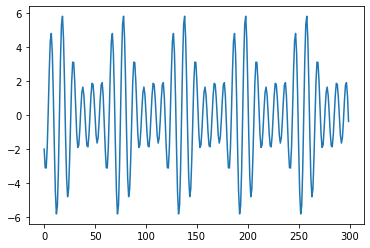

In [6]:
plt.plot(Y)

In [12]:
Y

array([-2.00000000e+00, -3.08866992e+00, -3.11002472e+00, -1.90211303e+00,
        2.31166138e-01,  2.59807621e+00,  4.35114101e+00,  4.79313205e+00,
        3.64525786e+00,  1.17557050e+00, -1.86602540e+00, -4.48992846e+00,
       -5.80422607e+00, -5.32836518e+00, -3.17009240e+00,  0.00000000e+00,
        3.17009240e+00,  5.32836518e+00,  5.80422607e+00,  4.48992846e+00,
        1.86602540e+00, -1.17557050e+00, -3.64525786e+00, -4.79313205e+00,
       -4.35114101e+00, -2.59807621e+00, -2.31166138e-01,  1.90211303e+00,
        3.11002472e+00,  3.08866992e+00,  2.00000000e+00,  3.75431694e-01,
       -1.11002472e+00, -1.90211303e+00, -1.76883386e+00, -8.66025404e-01,
        3.51141009e-01,  1.32903043e+00,  1.64525786e+00,  1.17557050e+00,
        1.33974596e-01, -1.02582684e+00, -1.80422607e+00, -1.86426357e+00,
       -1.17009240e+00, -1.46957616e-15,  1.17009240e+00,  1.86426357e+00,
        1.80422607e+00,  1.02582684e+00, -1.33974596e-01, -1.17557050e+00,
       -1.64525786e+00, -

In [19]:
periodo=60
matriz=np.ones((200,periodo))*np.nan
for i in range(periodo):
    matriz[i:,i]=Y[0:200-i]

In [20]:
matriz=matriz[59:]

In [21]:
matriz

array([[-3.75431694e-01,  1.11002472e+00,  1.90211303e+00, ...,
        -3.11002472e+00, -3.08866992e+00, -2.00000000e+00],
       [-2.00000000e+00, -3.75431694e-01,  1.11002472e+00, ...,
        -1.90211303e+00, -3.11002472e+00, -3.08866992e+00],
       [-3.08866992e+00, -2.00000000e+00, -3.75431694e-01, ...,
         2.31166138e-01, -1.90211303e+00, -3.11002472e+00],
       ...,
       [ 5.32836518e+00,  3.17009240e+00, -3.77240733e-14, ...,
         1.86602540e+00,  4.48992846e+00,  5.80422607e+00],
       [ 5.80422607e+00,  5.32836518e+00,  3.17009240e+00, ...,
        -1.17557050e+00,  1.86602540e+00,  4.48992846e+00],
       [ 4.48992846e+00,  5.80422607e+00,  5.32836518e+00, ...,
        -3.64525786e+00, -1.17557050e+00,  1.86602540e+00]])

In [22]:
Uv1,Sf1,Vhf1=np.linalg.svd(matriz)

print(Uv1.shape,Sf1.shape,Vhf1.shape)

(141, 141) (60,) (60, 60)


A la hora del ajuste son las pc's que se deben ajustar

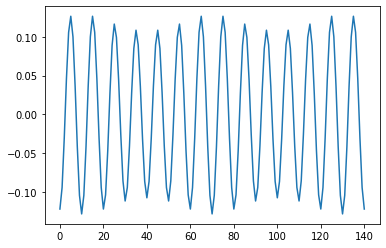

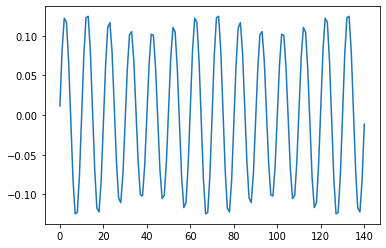

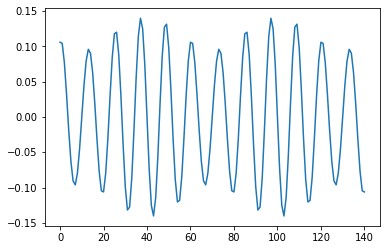

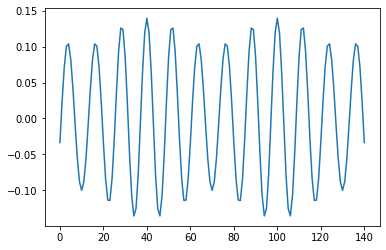

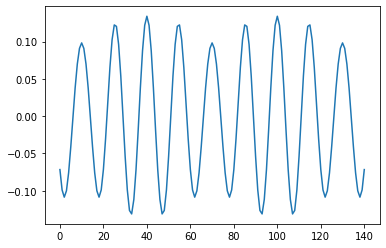

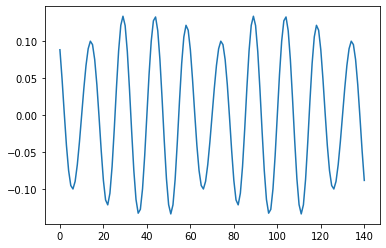

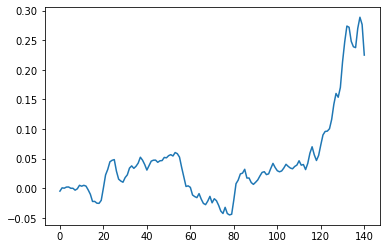

In [30]:
for i in range(7):
    plt.figure()
    plt.plot(Uv1[:,i])

In [44]:
modos=200-periodo
F=[]
horizonte=4
for i in range(modos):
    predictor=Uv1[0:-horizonte,i]
    predictand=Uv1[horizonte:,i]
    m,b=np.polyfit(predictor,predictand,1)
    f=lambda x:m*x+b
    F.append(f)
#     print(f)
# Corr=np.ones()

In [41]:
np.polyfit(predictor,predictand,1)

array([-0.8085164 ,  0.00151781])

Para validar, se deben proyectar los datos de validación sobre estos modos

componente princpical es la varaicón temporal de un modo